## Loading train Dataset 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


### EDA on Train data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

### Conducting hypothesis test on Independent variables w.r.t target variable 

In [94]:
from scipy.stats import zscore

import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Lets do hypothesis test on Location type
Null hypothesis : Location type will impact our target variable

Alternate hypothesis : Location type will not impact target variable

In [97]:
Loc = ols('product_wg_ton ~ Location_type', data = df).fit()
L_T = sm.stats.anova_lm(Loc, typ = 2)
L_T

,sum_sq,df,F,PR(>F)
Location_type,1.646450e+10,1.0,122.475383,2.156277e-28
Residual,2.977379e+12,22148.0,NaN,NaN


By Oneway Anova it was seen that P value is less than 0.05 so we reject Null hypothesis 

### Hypothesis test on WH_capacity size

In [98]:
Cap = ols('product_wg_ton ~ WH_capacity_size', data = df).fit()
WH_cap = sm.stats.anova_lm(Cap, typ = 2)
WH_cap

,sum_sq,df,F,PR(>F)
WH_capacity_size,2.546020e+08,2.0,0.941791,0.389944
Residual,2.993589e+12,22147.0,NaN,NaN


### Using oneway Anova test it was shown that P value is greater than 0.05 so we fail to reject null hypothesis 

###### Hypothesis test on Zone 

#### Null Hypothesis : Zone will impact our target variable
#### Alternate Hypothesis : Zone will not impact target variable

In [99]:
Zone = ols('product_wg_ton ~ zone', data = df).fit()
WH_zone = sm.stats.anova_lm(Zone, typ = 2)
WH_zone

,sum_sq,df,F,PR(>F)
zone,5.239619e+08,3.0,1.292173,0.275139
Residual,2.993320e+12,22146.0,NaN,NaN


 by One way Anova it was shown that p value is greater than 0.05 so it fail to reject null hypothesis 

###### Hypothesis test on Warehouse regional zone 

In [100]:
Reg = ols('product_wg_ton ~ WH_regional_zone', data = df).fit()
R_Z = sm.stats.anova_lm(Reg, typ = 2)
R_Z

,sum_sq,df,F,PR(>F)
WH_regional_zone,6.824735e+08,5.0,1.009815,0.409949
Residual,2.993161e+12,22144.0,NaN,NaN


 by using Oneway Anova it was shown that P value is greater than 0.05 so it fail to reject null hypothesis 

### Hypothesis test on num_refill_req_l3m

#### Null hypothesis : Num of refill req for last 3months will impact target variable
#### Alternate hypothesis : Num of refill req for last 3 months will not impact target variable

In [101]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['num_refill_req_l3m'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   35864
p_value: 0.47531
dof_value:  35848


In [102]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['num_refill_req_l3m'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.4753148954883743


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


##### by using z test it was shown that p value is greater tahn 0.05 so it fail to reject null hypothesis 

In [103]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['transport_issue_l1y'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   13124
p_value: 0.97472
dof_value:  13443


In [104]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['transport_issue_l1y'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.9747168296818711


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


##### p value is greater than 0.05 so it fail to accept null hypothesis 

#### Hypothesis test on Competitor in market
#### Null Hypothesis : It will impact target variable
#### Alternate Hypothesis : It will not impact target variable 

In [105]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['Competitor_in_mkt'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   30411
p_value: 0.99994
dof_value:  31367


In [106]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['Competitor_in_mkt'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.9999420533604761


the p value is greater than 0.05 so it fail to reject null hypothesis 

#### Hypothesis test on retail shop number
#### Null Hypothesis : It will impact Target variable
#### Alternate Hypothesis : It will not impact Target variable 

In [107]:
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['retail_shop_num'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.8003e+07
p_value: 1
dof_value:  1.8179e+07


In [108]:
#two sample Z test:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['retail_shop_num'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  1.0


p value is greater than 0.05 so it fail to reject null hypothesis 

#### Hypothesis test on distributor number
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [109]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['distributor_num'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   2.4634e+05
p_value: 0.56426
dof_value:  2.4646e+05


In [110]:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['distributor_num'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.5642593301188557


##### P value is greater than 0.05 so it fail to reject null hypothesis 

#### Hypothesis test on Flood impacted
#### Null Hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [111]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['flood_impacted'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   4527.6
p_value: 0.30951
dof_value:  4481


In [112]:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['flood_impacted'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.30951136591335854


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


##### p value is greater than 0.05 so it fail to reject null hypothesis  

#### Hypothesis test on Flood Proof
#### Null Hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis

In [113]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['flood_proof'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   4657.8
p_value: 0.032119
dof_value:  4481


In [114]:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['flood_proof'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.03211916379548164


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


##### p value is less than 0.05 so it rejects null hypothesis 

#### Hypothesis test on Electric Supply
#### Null Hypothesis : It will impact null hypothesis
#### Alternate Hypothesis : It will not impact null hypothesis 

In [115]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['electric_supply'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   4429.7
p_value: 0.70443
dof_value:  4481


In [116]:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['electric_supply'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.7044310543907484


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


p value is greater than 0.05 so it fail to reject null hypothesis 

#### Hypothesis test on distance from hub
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [117]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['dist_from_hub'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   9.6725e+05
p_value: 0.67844
dof_value:  9.679e+05


In [118]:
from statsmodels.stats.weightstats import ztest as ztest
hyp=pd.crosstab(df['dist_from_hub'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.6784351836411091


#### p value is greater than 0.05 so it will fail to reject null hypothesis

#### Hypothesis test on Workers number
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [120]:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['workers_num'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.6206e+05
p_value: 1
dof_value:  1.658e+05


In [121]:
hyp=pd.crosstab(df['workers_num'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.9999999999698241


p value is greater than 0.05 so it fail to reject null hypothesis 

Hypothesis test on Wh established year
Null hypothesis : It will impact null hypothesis

Alternate hypothesis : It will not impact null hypothesis 

In [122]:
hypothesis=pd.crosstab(df['wh_est_year'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.3732e+05
p_value: 1.6323e-222
dof_value:  1.2099e+05


In [123]:
hyp=pd.crosstab(df['wh_est_year'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  1.632263900525643e-222


##### p value is less than 0.05 so it rejects null hypothesis 

#### Hypothesis test on Storage issue reported l3m
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [124]:
hypothesis=pd.crosstab(df['storage_issue_reported_l3m'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   3.8577e+05
p_value: 0
dof_value:  1.6132e+05


In [125]:
hyp=pd.crosstab(df['storage_issue_reported_l3m'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.0


##### p value  is less than 0.05 so it will reject null hypothesis 

Hypothesis test on Temp reg mach

Null hypothesis : It will impact null hypothesis

Alternate hypothesis : It will not impact null hypothesis 

In [126]:
hypothesis=pd.crosstab(df['temp_reg_mach'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   4905.7
p_value: 6.5493e-06
dof_value:  4481


In [127]:
hyp=pd.crosstab(df['temp_reg_mach'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  6.549318329794456e-06


E:\anaconda\lib\site-packages\statsmodels\stats\weightstats.py:746: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


##### p value is less than 0.05 so it reject null hypothesis  

#### Hypothesis test on approved wh govt certificate
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis

In [128]:
govt = ols('product_wg_ton ~ approved_wh_govt_certificate', data = df).fit()
govt_c = sm.stats.anova_lm(govt, typ = 2)
govt_c

,sum_sq,df,F,PR(>F)
approved_wh_govt_certificate,1.639429e+11,4.0,320.72821,9.400720e-269
Residual,2.829901e+12,22145.0,NaN,NaN


#### p value is less than 0.05 so it reject null hypothesis  

#### Hypothesis test on Wh breakdown l3m
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [129]:
hypothesis=pd.crosstab(df['wh_breakdown_l3m'],df['product_wg_ton'])
chi2_stat,p_b,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   36263
p_value: 6.5493e-06
dof_value:  26886


In [130]:
hyp=pd.crosstab(df['wh_breakdown_l3m'],df['product_wg_ton'])
z,pval_b=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  6.549318329794456e-06


##### p value is less than 0.05 so it reject null hypothesis 


#### Hypothesis test on govt check l3m
#### Null hypothesis : It will impact null hypothesis
#### Alternate hypothesis : It will not impact null hypothesis 

In [131]:
hypothesis=pd.crosstab(df['govt_check_l3m'],df['product_wg_ton'])
chi2_stat,p_b,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.3788e+05
p_value: 6.5493e-06
dof_value:  1.3891e+05


In [132]:
hyp=pd.crosstab(df['govt_check_l3m'],df['product_wg_ton'])
z,pval_b=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  6.549318329794456e-06


##### p value is less than 0.05 so it reject null hypothesis 

### Missing value Imputation 

In [4]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [5]:
# filling null values by median in case of numerical and by ode in case of categorical
df['workers_num'].fillna(df['workers_num'].median(),inplace = True)
df['wh_est_year'].fillna(df['wh_est_year'].mode()[0],inplace = True)
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace = True)

In [6]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Outlier detection 

In [7]:
df.describe().columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


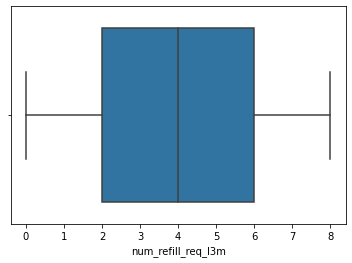

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


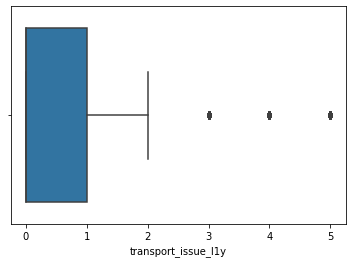

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


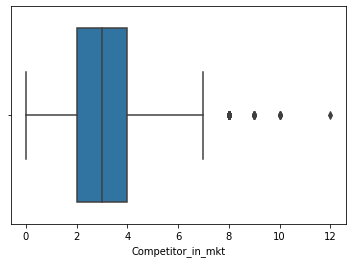

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


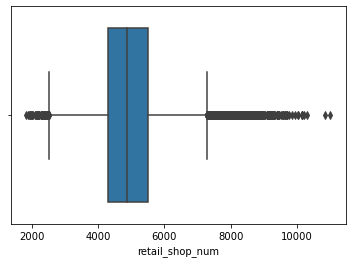

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


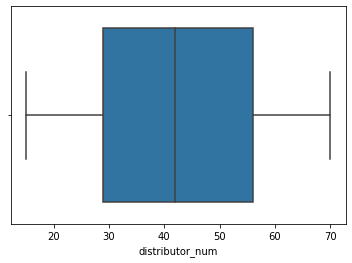

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


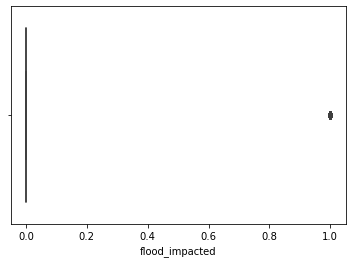

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


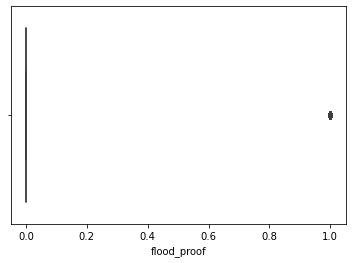

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


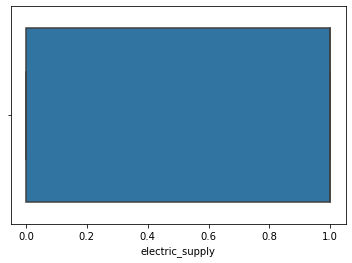

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


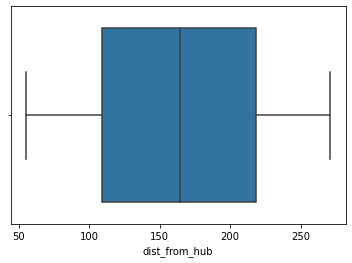

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


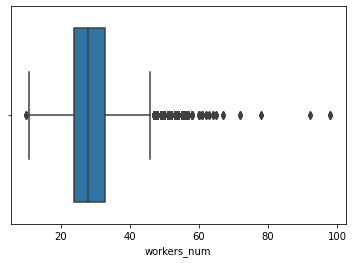

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


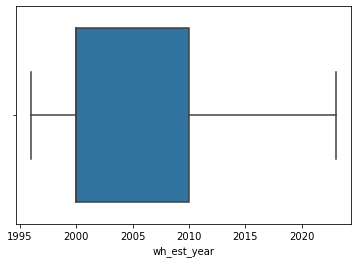

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


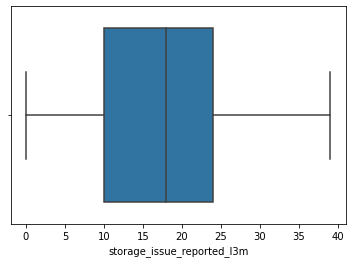

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


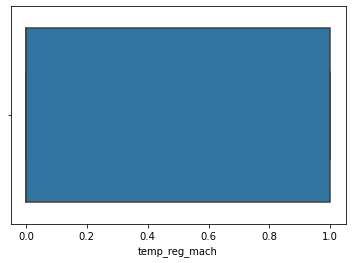

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


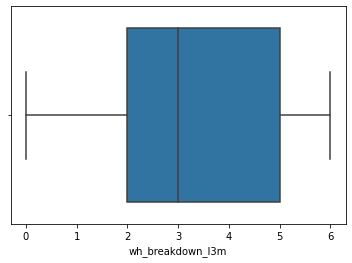

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


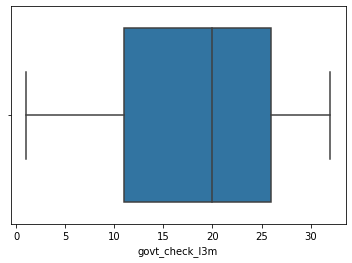

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


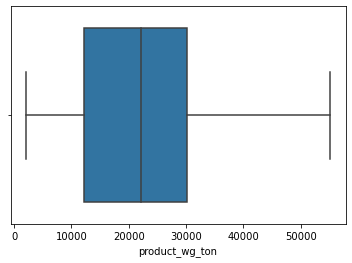

In [8]:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

In [9]:
col_sel=['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','workers_num']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df, col_sel, 1.5)

### Feature Engineering 

#### WH_breakdown_l3m  

In [10]:
# combining the variables 
# wh_breakdown_l3m variable was rejected our null hypothesis so I combine it with govt_check_l3m
df['New_wh_breakdown'] = df['wh_breakdown_l3m'] + df['govt_check_l3m']

In [133]:
hypothesis=pd.crosstab(df['New_wh_breakdown'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.6637e+05
p_value: 0.15969
dof_value:  1.658e+05


In [134]:
hyp=pd.crosstab(df['New_wh_breakdown'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  0.15969200302684997


##### by joining these two numerical variables we can say that it will impact target variable as p value is greater than alpha 

### WH_est_year 

In [11]:
df['New_est'] = df['wh_est_year'] + df['retail_shop_num']

In [135]:
hypothesis=pd.crosstab(df['New_est'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")

chi2_value:   1.8413e+07
p_value: 1
dof_value:  1.8507e+07


In [136]:
hyp=pd.crosstab(df['New_est'],df['product_wg_ton'])
z,pval=ztest(hyp)
print("z_value: ",z)
print("p_Value: ",p)

z_value:  [1. 1. 1. ... 1. 1. 1.]
p_Value:  1.0


##### After Feature engineering p value increases to 1 so it fail to reject null hypothesis 

### Converting categorical to numerical using One hot encoding 

In [12]:
df.select_dtypes(include = ['object']).columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [13]:
df_new = pd.get_dummies(df,columns = ['Location_type', 'WH_capacity_size','zone','WH_regional_zone',
                                      'wh_owner_type','approved_wh_govt_certificate'], drop_first = True)

In [14]:
df_new.shape

(22150, 36)

In [15]:
df_new.drop(['WH_Manager_ID','Ware_house_ID'],axis = 1, inplace = True)

In [16]:
df_new.shape

(22150, 34)

<AxesSubplot:>

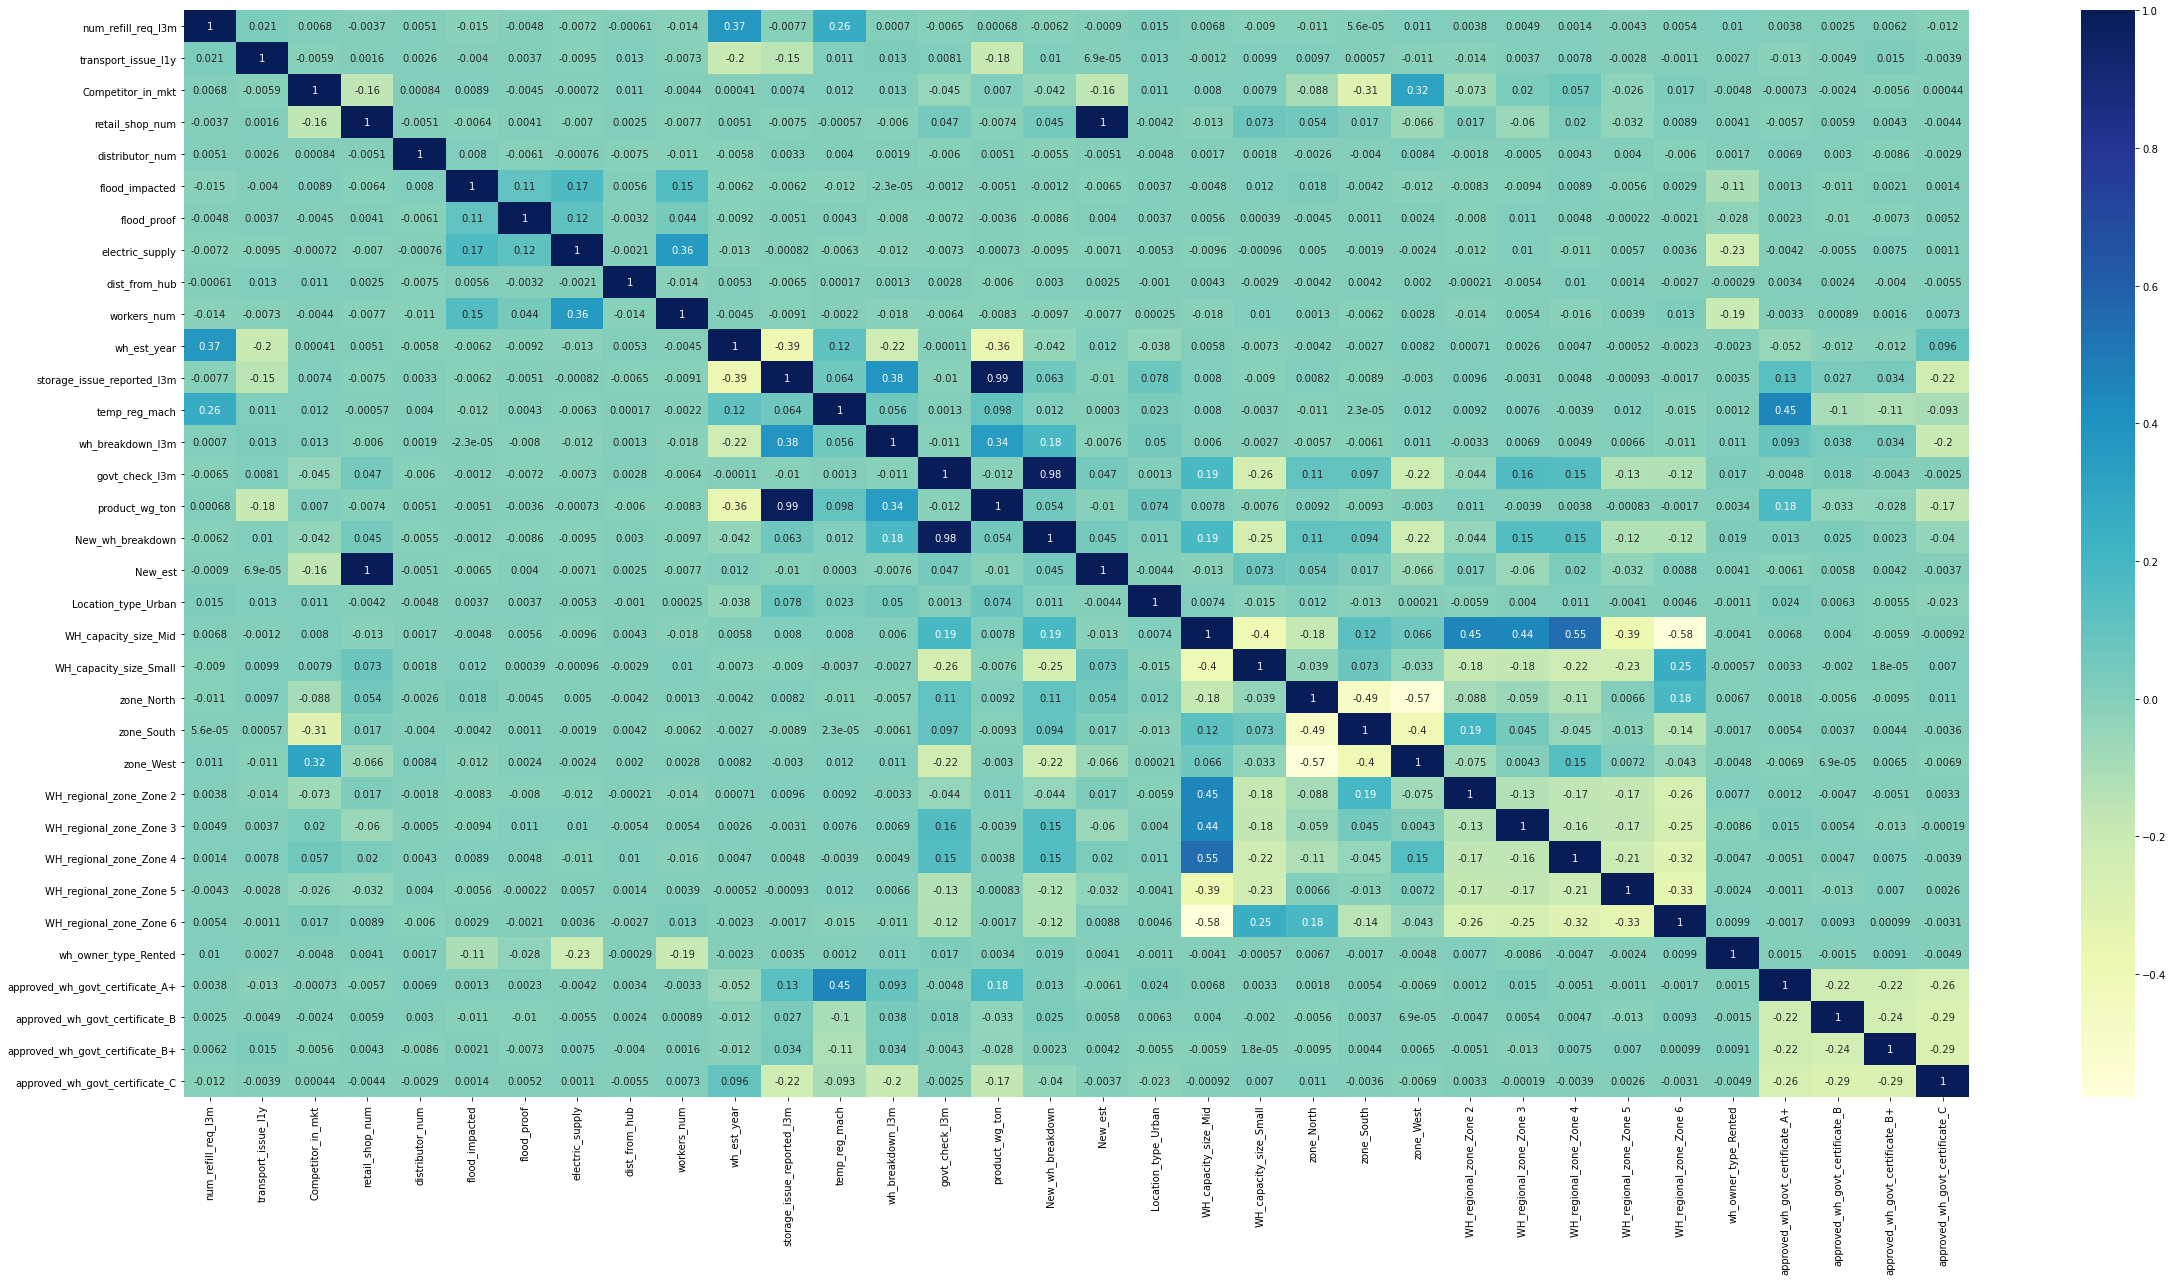

In [17]:
plt.figure(figsize = (40,20))
sns.heatmap(df_new.corr(),annot = True, cmap = 'YlGnBu')

### Checking VIF 

In [18]:
Default_indep=df_new.loc[:,df_new.columns!='product_wg_ton']
import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of transport_issue_l1y is 0.3595014107842214
VIF for transport_issue_l1y is 1.56
R-Sqr value of Competitor_in_mkt is 0.9094142795648851
VIF for Competitor_in_mkt is 11.04
R-Sqr value of retail_shop_num is 1.0
VIF for retail_shop_num is inf
R-Sqr value of distributor_num is 0.874574107760357
VIF for distributor_num is 7.97


<ipython-input-18-87e0836a3f8f>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


R-Sqr value of flood_impacted is 0.14497732475606273
VIF for flood_impacted is 1.17
R-Sqr value of flood_proof is 0.07542095625175005
VIF for flood_proof is 1.08
R-Sqr value of electric_supply is 0.7152256572676795
VIF for electric_supply is 3.51
R-Sqr value of dist_from_hub is 0.8722356743760785
VIF for dist_from_hub is 7.83
R-Sqr value of workers_num is 0.9506745999265114
VIF for workers_num is 20.27
R-Sqr value of wh_est_year is 1.0
VIF for wh_est_year is inf
R-Sqr value of storage_issue_reported_l3m is 0.8204593735263714
VIF for storage_issue_reported_l3m is 5.57
R-Sqr value of temp_reg_mach is 0.4933216044559997
VIF for temp_reg_mach is 1.97
R-Sqr value of wh_breakdown_l3m is 1.0
VIF for wh_breakdown_l3m is inf
R-Sqr value of govt_check_l3m is 1.0
VIF for govt_check_l3m is inf
R-Sqr value of New_wh_breakdown is 1.0
VIF for New_wh_breakdown is inf
R-Sqr value of New_est is 1.0
VIF for New_est is inf
R-Sqr value of Location_type_Urban is -67.8745502739377
VIF for Location_type_Urban

### Removing Multicollinearity using PCA 

In [19]:
from sklearn.decomposition import PCA
pca=PCA()

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar=StandardScaler()
scalar.fit(Default_indep)
scaled_df=scalar.transform(Default_indep)

In [22]:
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[ 3.05450191e-04, -2.66383929e-03,  4.86310468e-02, ...,
        -1.48563932e-02,  1.74664565e-03,  2.84273173e-02],
       [ 2.70490312e-02, -1.46664504e-02,  2.70356759e-01, ...,
        -2.03168718e-02, -6.26110350e-03,  2.61461121e-02],
       [ 9.25445495e-02, -1.63377005e-02, -1.08749961e-01, ...,
        -4.74989128e-02, -3.43552440e-02,  2.68035913e-01],
       ...,
       [-3.49237732e-17,  3.02639518e-16,  2.17530090e-16, ...,
        -4.37417603e-17,  1.45741813e-16, -1.29331094e-17],
       [ 0.00000000e+00,  8.11781435e-17,  2.48509914e-16, ...,
        -6.41622785e-17, -1.77649081e-17, -1.56142341e-17],
       [-0.00000000e+00, -9.34228515e-17, -7.60915528e-18, ...,
        -9.13305221e-17, -3.42194095e-16, -1.30846801e-16]])

In [23]:
PCA_result.explained_variance_

array([2.83049102e+00, 2.28503025e+00, 1.99294285e+00, 1.87737958e+00,
       1.69282123e+00, 1.67505278e+00, 1.65052766e+00, 1.42652579e+00,
       1.31731352e+00, 1.27488798e+00, 1.24173773e+00, 1.12645689e+00,
       1.09950941e+00, 1.01995598e+00, 1.01067413e+00, 1.00767211e+00,
       9.92265554e-01, 9.81921346e-01, 9.36181376e-01, 8.68200857e-01,
       8.26654411e-01, 7.47371857e-01, 6.72978917e-01, 6.32666788e-01,
       5.92123611e-01, 5.32526623e-01, 3.68921561e-01, 2.28960888e-01,
       6.77236138e-02, 2.40136102e-02, 5.58215927e-31, 5.26135775e-32,
       2.30066905e-33])

### Spliting data into x and y 

In [24]:
x = df_new.drop('product_wg_ton',axis = 1)
y = df_new['product_wg_ton']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

### Checking score using Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [27]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [28]:
x_train_pred = lm.predict(x_train)
training_data_score = r2_score(x_train_pred,y_train)
print('r2 score for training data is :', training_data_score)

r2 score for training data is : 0.9858719293104435


In [29]:
x_test_pred = lm.predict(x_test)
test_data_score = r2_score(x_test_pred,y_test)
print("R2_score on test data is: ",test_data_score)

R2_score on test data is:  0.9860237244862268


#### Checking score using XGBRegressor 

In [30]:
from xgboost import XGBRegressor
Xg = XGBRegressor()
Xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
x_train_pred = Xg.predict(x_train)
training_data_score = r2_score(x_train_pred,y_train)
print('r2 score for training data is :', training_data_score)

r2 score for training data is : 0.9974684943045345


In [32]:

x_test_pred = Xg.predict(x_test)
test_data_score = r2_score(x_test_pred,y_test)
print("R2_score on test data is: ",test_data_score)

R2_score on test data is:  0.9941084028193614


### Checking score using Decision Tree regressor 

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
DT = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 3)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [35]:
x_train_pred = DT.predict(x_train)
training_data_score = r2_score(x_train_pred,y_train)
print('r2 score for training data is :', training_data_score)

r2 score for training data is : 0.9465468811597443


In [36]:
x_test_pred = DT.predict(x_test)
test_data_score = r2_score(x_test_pred,y_test)
print('r2 score for test data is :', test_data_score)

r2 score for test data is : 0.9441856218353777


### Checking score using RandomForest Regressor 

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
RF = RandomForestRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 3)
RF.fit(x_train,y_train)
x_train_pred = RF.predict(x_train)
training_data_score = r2_score(x_train_pred,y_train)
print('r2 score for training data is :', training_data_score)

r2 score for training data is : 0.9086237050253719


In [39]:
x_test_pred = RF.predict(x_test)
test_data_score = r2_score(x_test_pred,y_test)
print('r2 score for test data is :', test_data_score)

r2 score for test data is : 0.9054581981221601


In [40]:
# Conclusion : Hence I find r2 score using algorithms like Linear regression, XGB, Decision Tree, Random Forest out of these the
# LinearRegression, XGB, and decision tree are giving good scores so the top 3 models i prefer is Linear regression, XGB,DT
# Now lets predict the data using above 3 models

In [41]:
pd.set_option("display.max_columns",None)
x_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
2554,7,0.0,3.0,4413.0,49.0,0,0,1,162,29.0,2002.0,27,0,4,10,14,6415.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
16089,4,1.0,4.0,4727.0,64.0,0,0,0,137,36.0,2001.0,28,0,5,27,32,6728.0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
5990,5,0.0,3.0,4981.0,67.0,0,0,1,173,39.0,2003.0,36,0,5,6,11,6984.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3982,8,2.0,2.0,4178.0,42.0,0,0,1,239,42.0,2000.0,26,0,4,11,15,6178.0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
21276,4,0.0,3.0,4986.0,29.0,0,0,1,116,29.0,2006.0,15,0,3,18,21,6992.0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0


## Loading test data 

In [48]:
df1 = pd.read_excel("Supply chain test dataset (1).xlsx")
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,Company Owned,26,0,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,Rented,61,0,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,Rented,26,0,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,Rented,36,0,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,Rented,58,0,0,1,237,NaN,NaN,21,1,B+,2,12


## EDA on test data 

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 2750 non-null   object 
 1   WH_Manager_ID                 2750 non-null   object 
 2   Location_type                 2750 non-null   object 
 3   WH_capacity_size              2750 non-null   object 
 4   zone                          2750 non-null   object 
 5   WH_regional_zone              2750 non-null   object 
 6   num_refill_req_l3m            2750 non-null   int64  
 7   transport_issue_l1y           2750 non-null   int64  
 8   Competitor_in_mkt             2750 non-null   int64  
 9   retail_shop_num               2750 non-null   int64  
 10  wh_owner_type                 2750 non-null   object 
 11  distributor_num               2750 non-null   int64  
 12  flood_impacted                2750 non-null   int64  
 13  flo

In [50]:
df1.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

### Missing value imputation 

In [51]:
df1['workers_num'].fillna(df1['workers_num'].median(),inplace = True)
df1['wh_est_year'].fillna(df1['wh_est_year'].mode()[0],inplace = True)
df1['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0], inplace = True)

In [52]:
df1.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

### Outlier detection on test data 

In [53]:
df1.describe().columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m'],
      dtype='object')

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


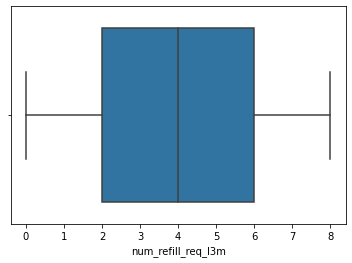

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


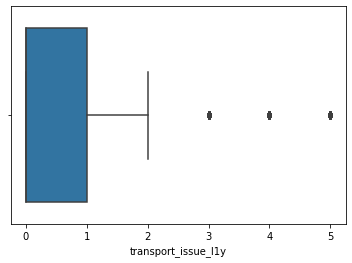

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


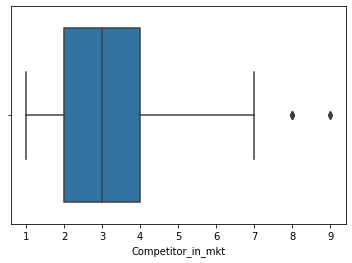

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


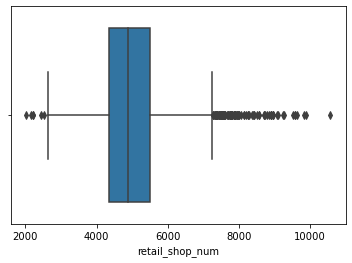

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


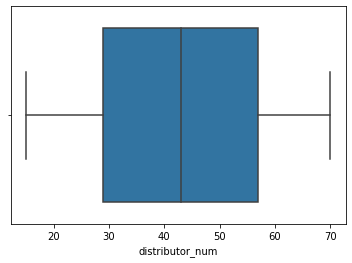

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


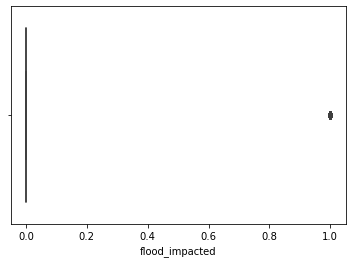

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


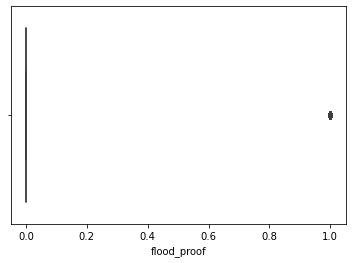

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


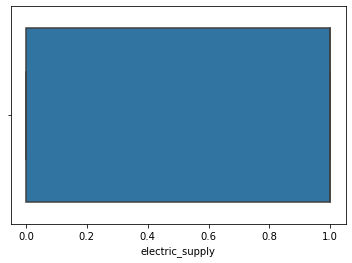

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


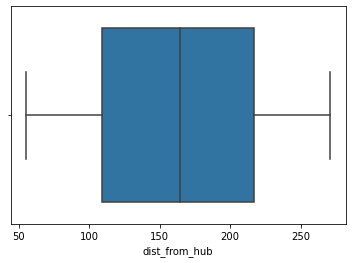

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


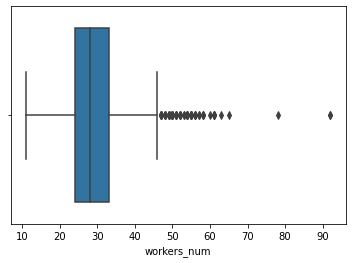

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


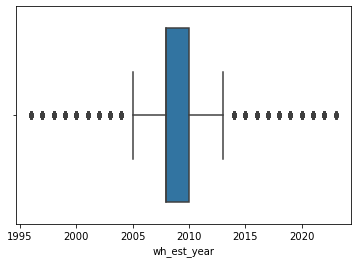

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


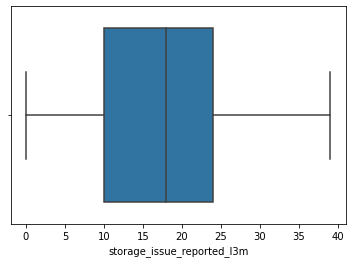

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


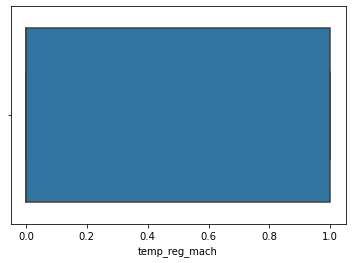

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


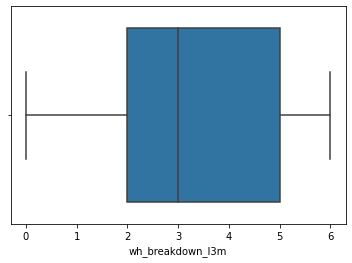

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


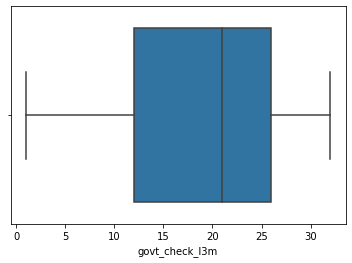

In [54]:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

In [55]:
col_sel=['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','workers_num','wh_est_year']
def iqr_capping(df1, cols, factor):
    
    for col in cols:
        
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[col] = np.where(df1[col]>upper_whisker, upper_whisker,
                 np.where(df1[col]<lower_whisker, lower_whisker, df1[col]))


iqr_capping(df1, col_sel, 1.5)

In [56]:
df1.shape

(2750, 23)

### Feature Engineering on test data 

In [57]:
df1['New_wh_breakdown'] = df1['wh_breakdown_l3m'] + df1['govt_check_l3m']

In [58]:
df1['New_est'] = df1['wh_est_year'] + df1['retail_shop_num']

In [59]:
# we have done feature engineering on these 2 variables in training data so done same on test data

In [60]:
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0.0,2.0,5397.000,Company Owned,26,0,0,1,75,30.0,2013.0,9,1,A,1,29,30,7410.000
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2.0,2.0,5183.000,Rented,61,0,0,0,138,20.0,2006.0,25,0,A,4,23,27,7189.000
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0.0,4.0,4665.000,Rented,26,0,0,1,188,34.0,2008.0,24,0,B,4,23,27,6673.000
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0.0,3.0,5196.000,Rented,36,0,0,1,156,31.0,2008.0,15,0,A,4,1,5,7204.000
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2.0,4.0,7248.125,Rented,58,0,0,1,237,28.0,2008.0,21,1,B+,2,12,14,9256.125


In [61]:
df1.shape

(2750, 25)

### Converting Categorical variables to numerical using One hot Encoding 

In [62]:
df1.select_dtypes(include = ['object']).columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [63]:
df1_new = pd.get_dummies(df1,columns = ['Location_type', 'WH_capacity_size','zone','WH_regional_zone',
                                      'wh_owner_type','approved_wh_govt_certificate'], drop_first = True)

In [64]:
df1_new.shape

(2750, 35)

In [65]:
df1_new.drop(['WH_Manager_ID','Ware_house_ID'],axis = 1, inplace = True)
print(df1_new.shape)

(2750, 33)


<AxesSubplot:>

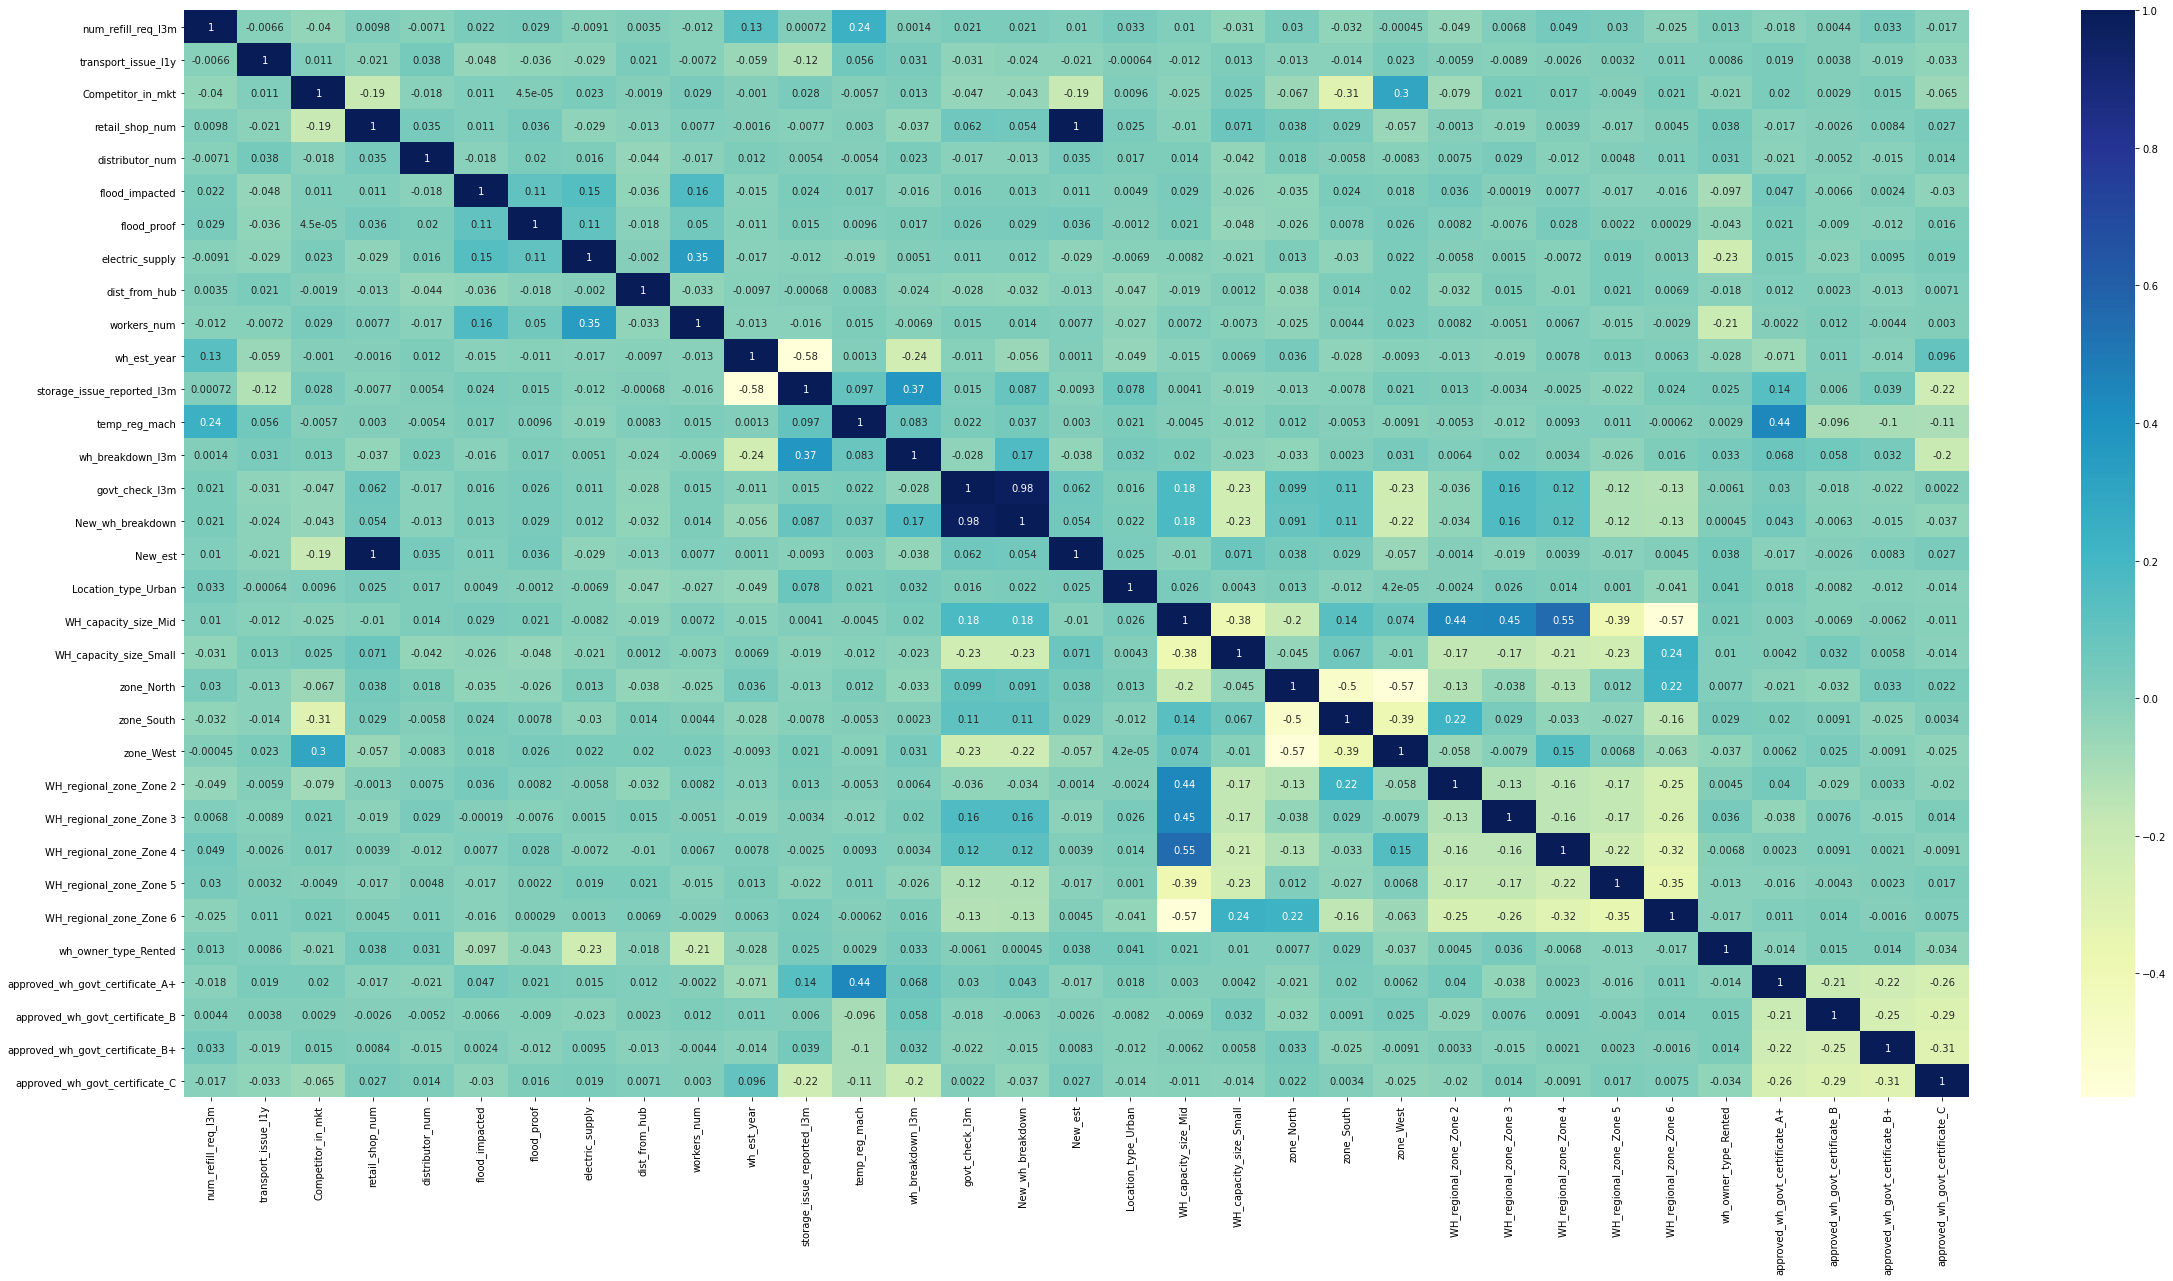

In [66]:
plt.figure(figsize = (40,20))
sns.heatmap(df1_new.corr(),annot = True, cmap = 'YlGnBu')

In [70]:
df1_new.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,7,0.0,2.0,5397.000,26,0,0,1,75,30.0,2013.0,9,1,1,29,30,7410.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,8,2.0,2.0,5183.000,61,0,0,0,138,20.0,2006.0,25,0,4,23,27,7189.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,3,0.0,4.0,4665.000,26,0,0,1,188,34.0,2008.0,24,0,4,23,27,6673.000,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,2,0.0,3.0,5196.000,36,0,0,1,156,31.0,2008.0,15,0,4,1,5,7204.000,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,5,2.0,4.0,7248.125,58,0,0,1,237,28.0,2008.0,21,1,2,12,14,9256.125,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [84]:
# prediction using XGBRegressor
prediction = Xg.predict(df1_new)

In [73]:
prediction

array([12503.222 , 32042.174 , 29283.969 , ..., 27571.455 , 23886.79  ,
        5018.7363], dtype=float32)

In [83]:
New_data = df1_new.assign(New_prod_wt_ton = prediction)
New_data.head(10)


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,New_prod_wt_ton
0,7,0.0,2.0,5397.000,26,0,0,1,75,30.0,2013.0,9,1,1,29,30,7410.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12503.221680
1,8,2.0,2.0,5183.000,61,0,0,0,138,20.0,2006.0,25,0,4,23,27,7189.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,32042.173828
2,3,0.0,4.0,4665.000,26,0,0,1,188,34.0,2008.0,24,0,4,23,27,6673.000,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,29283.968750
3,2,0.0,3.0,5196.000,36,0,0,1,156,31.0,2008.0,15,0,4,1,5,7204.000,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,20700.314453
4,5,2.0,4.0,7248.125,58,0,0,1,237,28.0,2008.0,21,1,2,12,14,9256.125,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,25787.498047
5,1,0.0,3.0,5392.000,41,0,0,1,90,29.0,2008.0,5,0,2,23,25,7400.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,6628.470703
6,8,0.0,4.0,4508.000,16,0,0,1,187,19.0,2005.0,28,0,5,23,28,6513.000,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34600.687500
7,7,0.0,4.0,5338.000,42,0,0,1,70,36.0,2006.0,19,0,2,17,19,7344.000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,22713.669922
8,0,1.0,2.0,4309.000,25,0,0,1,132,38.0,2008.0,18,0,3,22,25,6317.000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,23006.882812
9,4,2.5,4.0,4682.000,45,0,0,1,218,33.0,2005.0,25,1,3,12,15,6687.000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,32324.857422


In [82]:
New_data.shape

(2750, 34)

In [88]:
# prediction with LinearRegression
prediction1 = lm.predict(df1_new)

In [90]:
New_data1 = df1_new.assign(New_prod_wt_ton = prediction1)
New_data1.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,New_prod_wt_ton
0,7,0.0,2.0,5397.000,26,0,0,1,75,30.0,2013.0,9,1,1,29,30,7410.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,13566.277405
1,8,2.0,2.0,5183.000,61,0,0,0,138,20.0,2006.0,25,0,4,23,27,7189.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,32220.295171
2,3,0.0,4.0,4665.000,26,0,0,1,188,34.0,2008.0,24,0,4,23,27,6673.000,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,29625.609999
3,2,0.0,3.0,5196.000,36,0,0,1,156,31.0,2008.0,15,0,4,1,5,7204.000,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,20256.553233
4,5,2.0,4.0,7248.125,58,0,0,1,237,28.0,2008.0,21,1,2,12,14,9256.125,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,25922.278446
5,1,0.0,3.0,5392.000,41,0,0,1,90,29.0,2008.0,5,0,2,23,25,7400.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,8094.586712
6,8,0.0,4.0,4508.000,16,0,0,1,187,19.0,2005.0,28,0,5,23,28,6513.000,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,34310.987096
7,7,0.0,4.0,5338.000,42,0,0,1,70,36.0,2006.0,19,0,2,17,19,7344.000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,23473.073180
8,0,1.0,2.0,4309.000,25,0,0,1,132,38.0,2008.0,18,0,3,22,25,6317.000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,24176.224329
9,4,2.5,4.0,4682.000,45,0,0,1,218,33.0,2005.0,25,1,3,12,15,6687.000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,32807.456403


In [93]:
# prediction using Decision Tree
prediction2 = DT.predict(df1_new)

In [92]:
New_data2 = df1_new.assign(New_prod_wt_ton = prediction2)
New_data2.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_breakdown,New_est,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,New_prod_wt_ton
0,7,0.0,2.0,5397.000,26,0,0,1,75,30.0,2013.0,9,1,1,29,30,7410.000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,9400.046794
1,8,2.0,2.0,5183.000,61,0,0,0,138,20.0,2006.0,25,0,4,23,27,7189.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,30727.241023
2,3,0.0,4.0,4665.000,26,0,0,1,188,34.0,2008.0,24,0,4,23,27,6673.000,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,30389.082230
3,2,0.0,3.0,5196.000,36,0,0,1,156,31.0,2008.0,15,0,4,1,5,7204.000,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,19152.000000
4,5,2.0,4.0,7248.125,58,0,0,1,237,28.0,2008.0,21,1,2,12,14,9256.125,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,24086.115749
5,1,0.0,3.0,5392.000,41,0,0,1,90,29.0,2008.0,5,0,2,23,25,7400.000,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,5772.104315
6,8,0.0,4.0,4508.000,16,0,0,1,187,19.0,2005.0,28,0,5,23,28,6513.000,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,42657.718566
7,7,0.0,4.0,5338.000,42,0,0,1,70,36.0,2006.0,19,0,2,17,19,7344.000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,24086.115749
8,0,1.0,2.0,4309.000,25,0,0,1,132,38.0,2008.0,18,0,3,22,25,6317.000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,24086.115749
9,4,2.5,4.0,4682.000,45,0,0,1,218,33.0,2005.0,25,1,3,12,15,6687.000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,30389.082230


#### Conclusion:
From the provided historical data, I have analysed that there is a relation between wh_breakdow_l3m and govt_check_l3m, as when there is a breakdown there are more chances for checking done by govt and wh_est_year and retail_shop_num, there are more chances that from start year of the warehouse there will be a retail shop exist as they have to ship product to some particular shop number so i have done a feature engineering for these variables to get good results.  

Here by I concluded that, as I have used Linear Regression , XGBRegressor, DecisionTree for the prediction of test data.
LinearRegressor and XGBRegressor are giving good scores in train data i.e around 99% so its better to use Linear and XGB while predicting test data. Considering these two models it was given 'New_product_wg_ton' values as additional column which is added to test dataset.

### Recommendations:
Supply and demand is the backbone of warehousing services
In warehouse stock involves a lot of money: the unit value, transportation, packaging, storage, and other management that’s required. This all has to be done in such a way that the product is at the lowest possible price, so a well-balanced supply and demand system is the difference between the customer choosing your product at a lower price.
The goal is always to maximise efficiency while reducing costs. An important part of warehousing services is in determining the appropriate minimum level of stock, to ensure an item is always available.
The inventory manager can better achieve this by maintaining effective communication between different regions, made more possible by a high level of transparency throughout the system. 

And from this data I recommend that there should be a strong relation and communication between different regions and warehouse manager and the chances of wh_breakdown should reduce so that the shipment will increase and we can maintain good supply and demand. 